IMDB Sentiment Analysis Model


Part: 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
import kagglehub
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
print("Path to dataset files:",path)
import os
import pandas as pd
import numpy as np
dataset_path = os.path.join(path,"IMDB Dataset.csv")
df =pd.read_csv(dataset_path)
df.head(3)


Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [3]:
def preprocess(text, remove_stopwords=True, use_stemming=False):
  """
    Clean and preprocess text data

    Parameters:
    text (str): Input text to clean
    remove_stopwords (bool): Whether to remove stopwords
    use_stemming (bool): Use stemming if True, lemmatization if False

    Returns:
    str: Cleaned text
    """
  # convert to lowertext
  text = text.lower()

  # Remove special characters and digits
  text = re.sub(r'[^a-zA-Z\s]', '', text)

  # Tokenize (split into words)
  words = text.split()

  # Remove stopwords if specified
  if remove_stopwords:
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]

  # Apply stemming or lemmatization
  if use_stemming:
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
  else:
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]

  # Join back to string
  return ' '.join(words)

# applying preprocessing to all reviews
df['processed_revew']= df['review'].apply(preprocess)

print("Original:", df['review'].iloc[0])
print("Preprocessed Review:", df['processed_revew'].iloc[0])



Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due 

Task2-Split the dataset into training and testing sets (80% training, 20% testing).

In [4]:
X = df['processed_revew']
Y = df['sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nTraining class distribution:\n{Y_train.value_counts(normalize=True)}")

Training set: 40000 samples
Testing set: 10000 samples

Training class distribution:
sentiment
negative    0.500975
positive    0.499025
Name: proportion, dtype: float64


Task3- reviews into positive and negative categories using naive bayes

In [5]:
# Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
print("Shape of X_train_count:", X_train_count.shape)
print("Shape of X_test_count:", X_test_count.shape)

Shape of X_train_count: (40000, 144502)
Shape of X_test_count: (10000, 144502)


In [6]:
# Train the Naive Bayes classifier using the training set.
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_count, Y_train)
print("Model trained successfully!")

Model trained successfully!


In [7]:
# make prediction
y_pred= nb_classifier.predict(X_test_count)
y_pred_proba = nb_classifier.predict_proba(X_test_count)
print("Prediction made successfully!")

Prediction made successfully!


Part2-Evaluate the performance of the model

Model Evaluation

Accuracy: 0.8599

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.88      0.86      4961
    positive       0.87      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

ROC-AUC Score: 0.8600


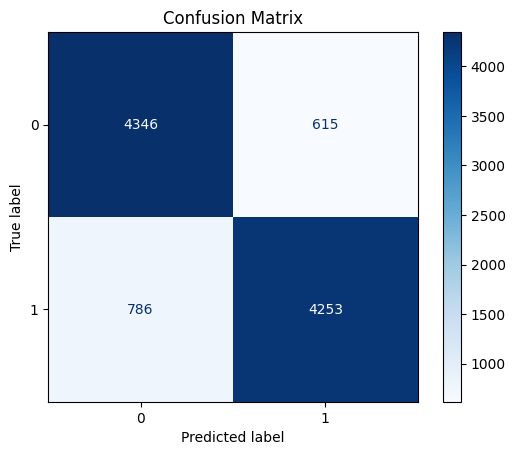

In [8]:
# evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay , roc_auc_score

y_test_binary = (Y_test == 'positive').astype(int)
y_pred_binary = (y_pred == 'positive').astype(int)


print("Model Evaluation\n")
print("="*50)

# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("="*50)


# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))
print("="*50)

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

# ROU-AUC score
roc_auc = roc_auc_score(y_test_binary, y_pred_binary)
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("="*50)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
print("="*50)

3- Feature Selection Exercise.

Part 1: Data Loading and Preprocessing

In [9]:
# Necessary Imports and Loading Datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

print("Dataset shape: ", X.shape)
print("Number of features: ", X.shape[1])
print("Number of samples: ", X.shape[0])

# check for missing values
print("Missing values: ", np.isnan(X).sum())

# basic statistics
print("Basic statistics: ")
print(pd.DataFrame(X, columns=feature_names).describe())

# split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape: ", X_train.shape[0])
print("Testing set shape: ", X_test.shape[0])

Dataset shape:  (569, 30)
Number of features:  30
Number of samples:  569
Missing values:  0
Basic statistics: 
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720   

Part 2: Apply a Wrapper Method

RFE RESULTS - TOP 5 FEATURES
------------------------------------------------------------
Selected features:
1. mean radius
2. texture error
3. worst radius
4. worst compactness
5. worst concavity


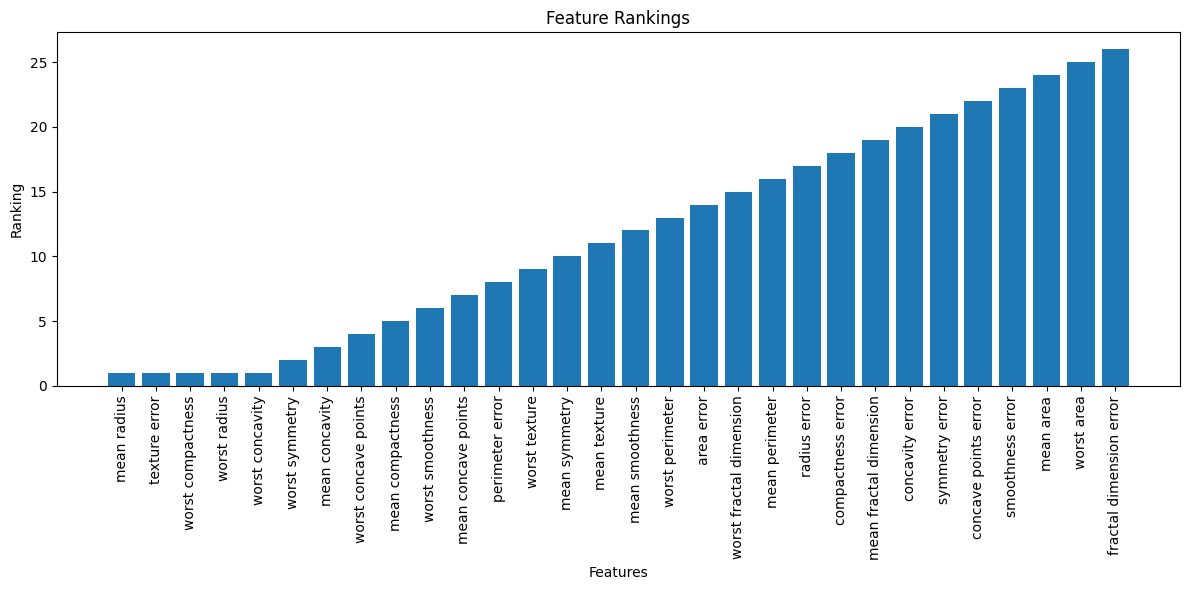

In [10]:
# create logistic regression as the estimator
estimator = LogisticRegression(max_iter=10000,random_state=42)

# Create an instance of RFE with the estimator and specify the number of features to select
num_features_to_select = 5
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Fit the RFE model to the training data
rfe.fit(X_train, y_train)

# Get feature ranking and support
feature_ranking = rfe.ranking_
feature_support = rfe.support_

# Print the results
# print("Feature ranking: ", feature_ranking)
# print("Feature support: ", feature_support)

selected_features = feature_names[feature_support]
selected_indices = np.where(feature_support)[0]

print("RFE RESULTS - TOP 5 FEATURES")
print("-"*60)
print("Selected features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Create a dataframe to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking, 'Support': feature_support})

# Sort the dataframe by ranking in ascending order
feature_importance_df = feature_importance_df.sort_values(by='Ranking')

# Create a bar chart to visualize feature rankings
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance_df)), feature_importance_df['Ranking'])
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Feature Rankings')
plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

Part 3: Model Evaluation

In [11]:
# evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# make predictions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model with selected feature
X_train_selected = X_train_scaled[:, selected_indices]
X_test_selected = X_test_scaled[:, selected_indices]

lr = LogisticRegression(max_iter=10000,random_state=42)
lr.fit(X_train_selected, y_train)

# make predictions
y_pred_select = lr.predict(X_test_selected)
y_pred_proba_selected = lr.predict_proba(X_test_selected)[:,1]

# train model with all features
lr_all = LogisticRegression(max_iter=10000,random_state=42)
lr_all.fit(X_train_scaled, y_train)
y_pred_all = lr_all.predict(X_test_scaled)
y_pred_proba_all = lr_all.predict_proba(X_test_scaled)[:,1]

# calucating metrics for selected feature
acc_selected = accuracy_score(y_test, y_pred_select)
prec_selected = precision_score(y_test, y_pred_select)
rec_selected = recall_score(y_test, y_pred_select)
f1_selected = f1_score(y_test, y_pred_select)
roc_selected = roc_auc_score(y_test, y_pred_proba_selected)

# calculating metrics for all features
acc_all = accuracy_score(y_test, y_pred_all)
prec_all = precision_score(y_test, y_pred_all)
rec_all = recall_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)
roc_all = roc_auc_score(y_test, y_pred_proba_all)

print("MODEL EVALUATION - SELECTED FEATURES (5)")
print(f"Accuracy:  {acc_selected:.4f}")
print(f"Precision: {prec_selected:.4f}")
print(f"Recall:    {rec_selected:.4f}")
print(f"F1-Score:  {f1_selected:.4f}")
print(f"ROC-AUC:   {roc_selected:.4f}")

print("MODEL EVALUATION - ALL FEATURES (30)")
print(f"Accuracy:  {acc_all:.4f}")
print(f"Precision: {prec_all:.4f}")
print(f"Recall:    {rec_all:.4f}")
print(f"F1-Score:  {f1_all:.4f}")
print(f"ROC-AUC:   {roc_all:.4f}")

# comparision
print("Comparision")
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Selected (5)': [acc_selected, prec_selected, rec_selected, f1_selected, roc_selected],
    'All (30)': [acc_all, prec_all, rec_all, f1_all, roc_all]
})
comparison['Difference'] = comparison['Selected (5)'] - comparison['All (30)']
print(comparison.to_string(index=False))

MODEL EVALUATION - SELECTED FEATURES (5)
Accuracy:  0.9561
Precision: 0.9583
Recall:    0.9718
F1-Score:  0.9650
ROC-AUC:   0.9980
MODEL EVALUATION - ALL FEATURES (30)
Accuracy:  0.9737
Precision: 0.9722
Recall:    0.9859
F1-Score:  0.9790
ROC-AUC:   0.9974
Comparision
   Metric  Selected (5)  All (30)  Difference
 Accuracy      0.956140  0.973684   -0.017544
Precision      0.958333  0.972222   -0.013889
   Recall      0.971831  0.985915   -0.014085
 F1-Score      0.965035  0.979021   -0.013986
  ROC-AUC      0.998035  0.997380    0.000655


Part 4: Experiment

In [12]:
# testing with different feature numbers
results=[]
for n_features in [3,5,7]:
  rfe_temp=RFE(LogisticRegression(max_iter=10000,random_state=42),n_features_to_select=n_features)
  rfe_temp.fit(X_train_scaled,y_train)

  X_train_temp = X_train_scaled[:, rfe_temp.support_]
  X_test_temp = X_test_scaled[:, rfe_temp.support_]

  lr_temp = LogisticRegression(max_iter=10000,random_state=42)
  lr_temp.fit(X_train_temp, y_train)
  y_pred_temp = lr_temp.predict(X_test_temp)

  results.append({
        'Features': n_features,
        'Accuracy': accuracy_score(y_test, y_pred_temp),
        'Precision': precision_score(y_test, y_pred_temp),
        'Recall': recall_score(y_test, y_pred_temp),
        'F1-Score': f1_score(y_test, y_pred_temp),
        'ROC-AUC': roc_auc_score(y_test, lr_temp.predict_proba(X_test_temp)[:, 1])
    })
results_df = pd.DataFrame(results)
print(results_df)


   Features  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0         3  0.964912   0.971831  0.971831  0.971831  0.997052
1         5  0.973684   0.972222  0.985915  0.979021  0.997707
2         7  0.973684   0.972222  0.985915  0.979021  0.998362


Discussion:
* RFE assists in eliminating redundant or noisy features
* Feature selection lowers model complexity
* Depending on the features chosen, performance may somewhat decline or improve.
* Using fewer but pertinent features enhances generalization.